In [1]:
import pandas as pd

# Load the first CSV file to understand its structure
tweets_df = pd.read_csv('./stock_tweets.csv')

# Load the second CSV file to understand its structure
finance_df = pd.read_csv('./stock_yfinance_data.csv')

In [6]:
import pandas as pd

# Load the data
tweets_df = pd.read_csv('./stock_tweets.csv')

# Display the first few rows of the dataframe to understand its structure
print("First few rows of the dataset:\n")
print(tweets_df.head(), '\n')

First few rows of the dataset:

                        Date  \
0  2022-09-29 23:41:16+00:00   
1  2022-09-29 23:24:43+00:00   
2  2022-09-29 23:18:08+00:00   
3  2022-09-29 22:40:07+00:00   
4  2022-09-29 22:27:05+00:00   

                                               Tweet Stock Name Company Name  
0  Mainstream media has done an amazing job at br...       TSLA  Tesla, Inc.  
1  Tesla delivery estimates are at around 364k fr...       TSLA  Tesla, Inc.  
2  3/ Even if I include 63.0M unvested RSUs as of...       TSLA  Tesla, Inc.  
3  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...       TSLA  Tesla, Inc.  
4  @RealDanODowd @Tesla Stop trying to kill kids,...       TSLA  Tesla, Inc.   



In [7]:
# Count the number of tweets for each company (assuming 'Stock Name' is the company column)
company_tweet_counts = tweets_df['Stock Name'].value_counts()

# Convert the Series to a DataFrame for better readability
company_tweet_counts_df = company_tweet_counts.reset_index()
company_tweet_counts_df.columns = ['Stock Name', 'Tweet Count']

# Display the resulting DataFrame in a well-formatted table
print("Tweet counts per company:\n")
print(company_tweet_counts_df.to_string(index=False))

Tweet counts per company:

Stock Name  Tweet Count
      TSLA        37422
       TSM        11034
      AAPL         5056
        PG         4089
      AMZN         4089
      MSFT         4089
       NIO         3021
      META         2751
       AMD         2227
      NFLX         1727
      GOOG         1291
      PYPL          843
       DIS          635
        BA          399
      COST          393
      INTC          315
        KO          310
       CRM          233
      XPEV          225
      ENPH          216
        ZS          193
        VZ          123
        BX           50
       NOC           31
         F           31


In [2]:
finance_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock Name'],
      dtype='object')

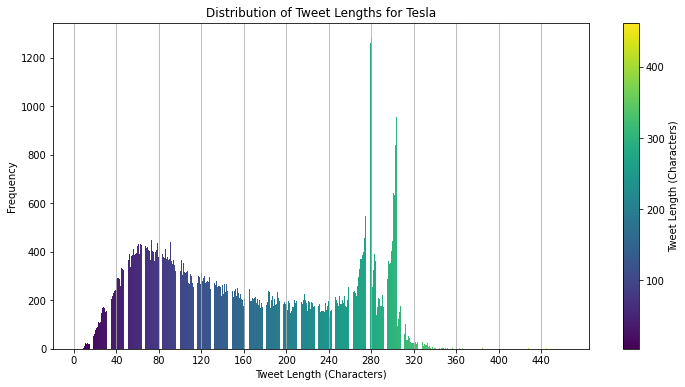

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Calculate the length of each tweet (in terms of characters)
tweet_lengths = tweets_df['Tweet'].str.len()

# Count the number of occurrences of each tweet length
tweet_length_counts = Counter(tweet_lengths)

# Prepare data for plotting
lengths = list(tweet_length_counts.keys())
counts = list(tweet_length_counts.values())

# Normalize tweet lengths to the range [0, 1] for color mapping
norm = plt.Normalize(vmin=min(lengths), vmax=max(lengths))
colors = plt.cm.viridis(norm(lengths))

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(lengths, counts, color=colors)

# Add a colorbar to reflect the normalized length mapping
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Only needed for the colorbar
cbar = plt.colorbar(sm, label='Tweet Length (Characters)')

# Title and labels
plt.title('Distribution of Tweet Lengths for Tesla')
plt.xlabel('Tweet Length (Characters)')
plt.ylabel('Frequency')

# Set x-axis ticks
plt.xticks(range(0, max(lengths) + 1, 40))

# Add grid for better readability
plt.grid(axis='x')

# Show the plot
plt.show()


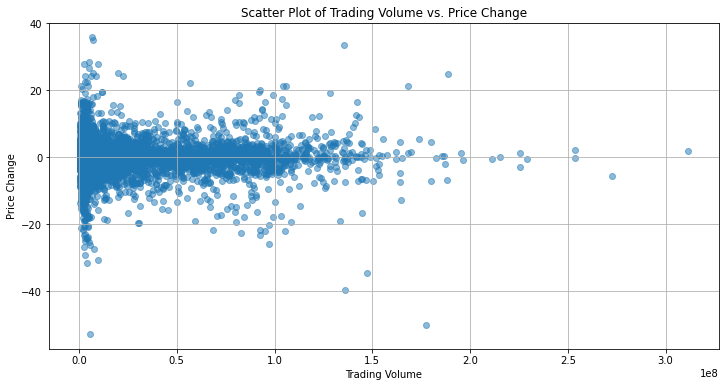

-0.009454781778173115

In [8]:
# Calculate daily price changes
finance_df['Price Change'] = finance_df['Close'] - finance_df['Open']

# Plot a scatter plot of Volume vs. Price Change
plt.figure(figsize=(12, 6))
plt.scatter(finance_df['Volume'], finance_df['Price Change'], alpha=0.5)
plt.title('Scatter Plot of Trading Volume vs. Price Change')
plt.xlabel('Trading Volume')
plt.ylabel('Price Change')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient between Volume and Price Change
correlation = finance_df['Volume'].corr(finance_df['Price Change'])
correlation

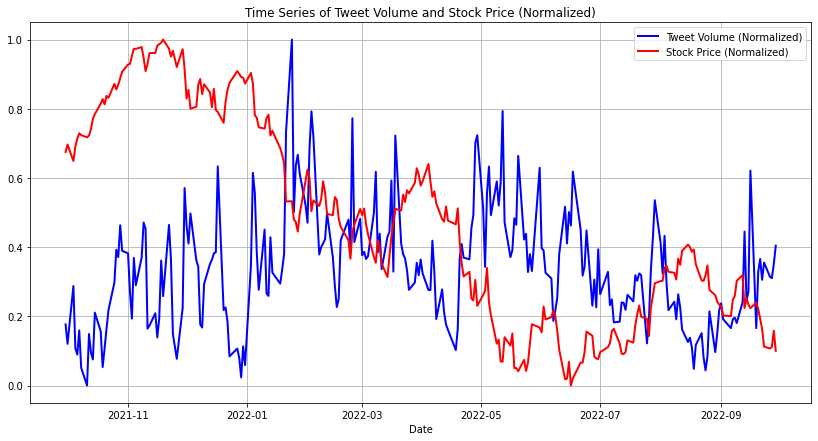

In [9]:
# Convert the 'Date' column of finance_df to datetime for proper merging
finance_df['Date'] = pd.to_datetime(finance_df['Date']).dt.date

# Aggregate stock price data by date using the closing price
stock_price_by_date = finance_df.groupby('Date')['Close'].mean()
tweet_volume_by_date = finance_df.groupby('Date')['Volume'].mean()
# Normalize both the volume and stock price data to fit on the same plot
# We will use min-max scaling for normalization
tweet_volume_normalized = (tweet_volume_by_date - tweet_volume_by_date.min()) / (tweet_volume_by_date.max() - tweet_volume_by_date.min())
stock_price_normalized = (stock_price_by_date - stock_price_by_date.min()) / (stock_price_by_date.max() - stock_price_by_date.min())

# Combine both series into a single DataFrame for plotting
combined_df = pd.concat([tweet_volume_normalized, stock_price_normalized], axis=1)
combined_df.columns = ['Tweet Volume', 'Stock Price']

# Plot both time series on the same chart
plt.figure(figsize=(14, 7))
combined_df['Tweet Volume'].plot(color='blue', linewidth=2, label='Tweet Volume (Normalized)')
combined_df['Stock Price'].plot(color='red', linewidth=2, label='Stock Price (Normalized)')
plt.title('Time Series of Tweet Volume and Stock Price (Normalized)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

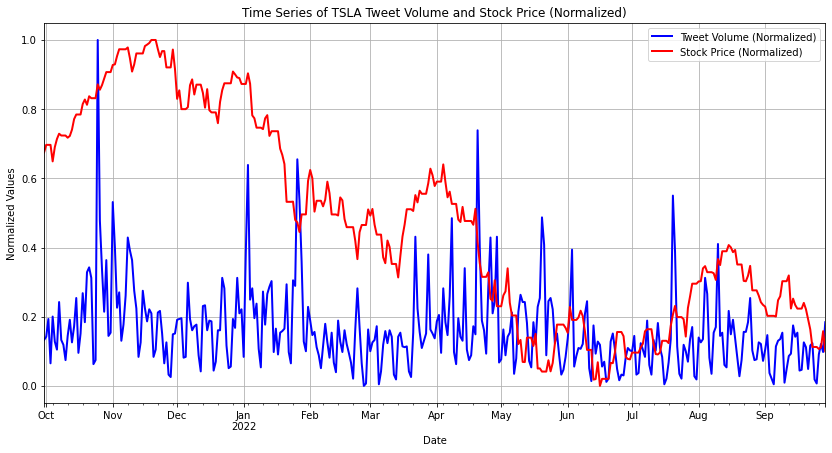

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' column in both datasets to datetime
tweets_df['Date'] = pd.to_datetime(tweets_df['Date']).dt.date
finance_df['Date'] = pd.to_datetime(finance_df['Date']).dt.date

# Filter tweets mentioning TSLA (assuming the Ticker column contains this information)
tsla_tweets_df = tweets_df[tweets_df['Stock Name'] == 'TSLA']

# Count the number of tweets per date
tweet_volume_by_date = tsla_tweets_df.groupby('Date').size()

# Aggregate stock price data by date using the closing price
stock_price_by_date = finance_df.groupby('Date')['Close'].mean()

# Create a date range that covers both datasets
date_range = pd.date_range(start=min(finance_df['Date'].min(), tweets_df['Date'].min()), 
                           end=max(finance_df['Date'].max(), tweets_df['Date'].max()))

# Reindex both series to ensure they cover the full date range
tweet_volume_by_date = tweet_volume_by_date.reindex(date_range, fill_value=0)
stock_price_by_date = stock_price_by_date.reindex(date_range, method='ffill')

# Normalize both the tweet volume and stock price data using min-max scaling
tweet_volume_normalized = (tweet_volume_by_date - tweet_volume_by_date.min()) / (tweet_volume_by_date.max() - tweet_volume_by_date.min())
stock_price_normalized = (stock_price_by_date - stock_price_by_date.min()) / (stock_price_by_date.max() - stock_price_by_date.min())

# Combine both series into a single DataFrame for plotting
combined_df = pd.concat([tweet_volume_normalized, stock_price_normalized], axis=1)
combined_df.columns = ['Tweet Volume', 'Stock Price']

# Plot both time series on the same chart
plt.figure(figsize=(14, 7))
combined_df['Tweet Volume'].plot(color='blue', linewidth=2, label='Tweet Volume (Normalized)')
combined_df['Stock Price'].plot(color='red', linewidth=2, label='Stock Price (Normalized)')
plt.title('Time Series of TSLA Tweet Volume and Stock Price (Normalized)')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()
